In [1]:
!unzip archive.zip
import pandas as pd

Archive:  archive.zip
  inflating: Car_sales.csv           


In [2]:
df = pd.read_csv("Car_sales.csv")

In [ ]:
df.info()
df.describe()
print(f"null values total: {df.isna().sum().sum()}")
for x in df.columns:
  print(f"null values in {x} = {df[x].isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Resale value has a very high amount of NaN values, so we should take that into account when doing analysis


In [3]:
df = df.fillna(df.mean())

<ipython-input-3-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
for x in df:
  print(x)
  print(df[x].unique())
  print(df[x].value_counts())

Manufacturer
['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Lexus' 'Lincoln'
 'Mitsubishi' 'Mercury' 'Mercedes-B' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Saab' 'Saturn' 'Subaru' 'Toyota' 'Volkswagen'
 'Volvo']
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64
Model
['Integra' 'TL' 'CL' 'RL' 'A4' 'A6' 'A8' '323i' '328i' '528i' 'Century'
 'Regal' 'Park Avenue' 'LeSabre' 'DeVille' 'Seville' 'Eldorado' 'Catera'
 '

In [4]:
def one_hot(df, column):
  new_list = {value: i+1 for i, value in enumerate(df[column].unique())}
  df.replace({column: new_list}, inplace=True)
  return new_list
manufacturers = one_hot(df, "Manufacturer")
model = one_hot(df, "Model")
types = one_hot(df, "Vehicle_type")
df


Manufacturer  Model  Sales_in_thousands  __year_resale_value  \
0               1      1              16.919            16.360000   
1               1      2              39.384            19.875000   
2               1      3              14.114            18.225000   
3               1      4               8.588            29.725000   
4               2      5              20.397            22.255000   
..            ...    ...                 ...                  ...   
152            30    152               3.545            18.072975   
153            30    153              15.245            18.072975   
154            30    154              17.531            18.072975   
155            30    155               3.493            18.072975   
156            30    156              18.969            18.072975   

     Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0               1           21.500000          1.8       140.0      101.2   
1               1           28.400000          3.2       225.0      108.1   
2               1           27.390755          3.2       225.0      106.9   
3               1           42.000000          3.5       210.0      114.6   
4               1           23.990000          1.8       150.0      102.6   
..            ...                 ...          ...         ...        ...   
152             1           24.400000          1.9       160.0      100.5   
153             1           27.500000          2.4       168.0      104.9   
154             1           28.800000          2.4       168.0      104.9   
155             1           45.500000          2.3       236.0      104.9   
156             1           36.000000          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2            77.043591  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]

In [5]:
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
df['year'] = df['Latest_Launch'].dt.year
df['month'] = df['Latest_Launch'].dt.month

In [ ]:
df

Manufacturer  Model  Sales_in_thousands  __year_resale_value  \
0               1      1              16.919            16.360000   
1               1      2              39.384            19.875000   
2               1      3              14.114            18.225000   
3               1      4               8.588            29.725000   
4               2      5              20.397            22.255000   
..            ...    ...                 ...                  ...   
152            30    152               3.545            18.072975   
153            30    153              15.245            18.072975   
154            30    154              17.531            18.072975   
155            30    155               3.493            18.072975   
156            30    156              18.969            18.072975   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger           21.500000          1.8       140.0      101.2   
1      Passenger           28.400000          3.2       225.0      108.1   
2      Passenger           27.390755          3.2       225.0      106.9   
3      Passenger           42.000000          3.5       210.0      114.6   
4      Passenger           23.990000          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger           24.400000          1.9       160.0      100.5   
153    Passenger           27.500000          2.4       168.0      104.9   
154    Passenger           28.800000          2.4       168.0      104.9   
155    Passenger           45.500000          2.3       236.0      104.9   
156    Passenger           36.000000          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0    2012-02-02   
1     70.3   192.9        3.517           17.2             25.0    2011-06-03   
2     70.6   192.0        3.470           17.2             26.0    2012-01-04   
3     71.4   196.6        3.850           18.0             22.0    2011-03-10   
4     68.2   178.0        2.998           16.4             27.0    2011-10-08   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0    2011-09-21   
153   69.3   185.9        3.208           17.9             25.0    2012-11-24   
154   69.3   186.2        3.259           17.9             25.0    2011-06-25   
155   71.5   185.7        3.601           18.5             23.0    2011-04-26   
156   72.1   189.8        3.600           21.1             24.0    2011-11-14   

     Power_perf_factor  year  month  
0            58.280150  2012      2  
1            91.370778  2011      6  
2            77.043591  2012      1  
3            91.389779  2011      3  
4            62.777639  2011     10  
..                 ...   ...    ...  
152          66.498812  2011      9  
153          70.654495  2012     11  
154          71.155978  2011      6  
155         101.623357  2011      4  
156          85.735655  2011     11  

[157 rows x 18 columns]

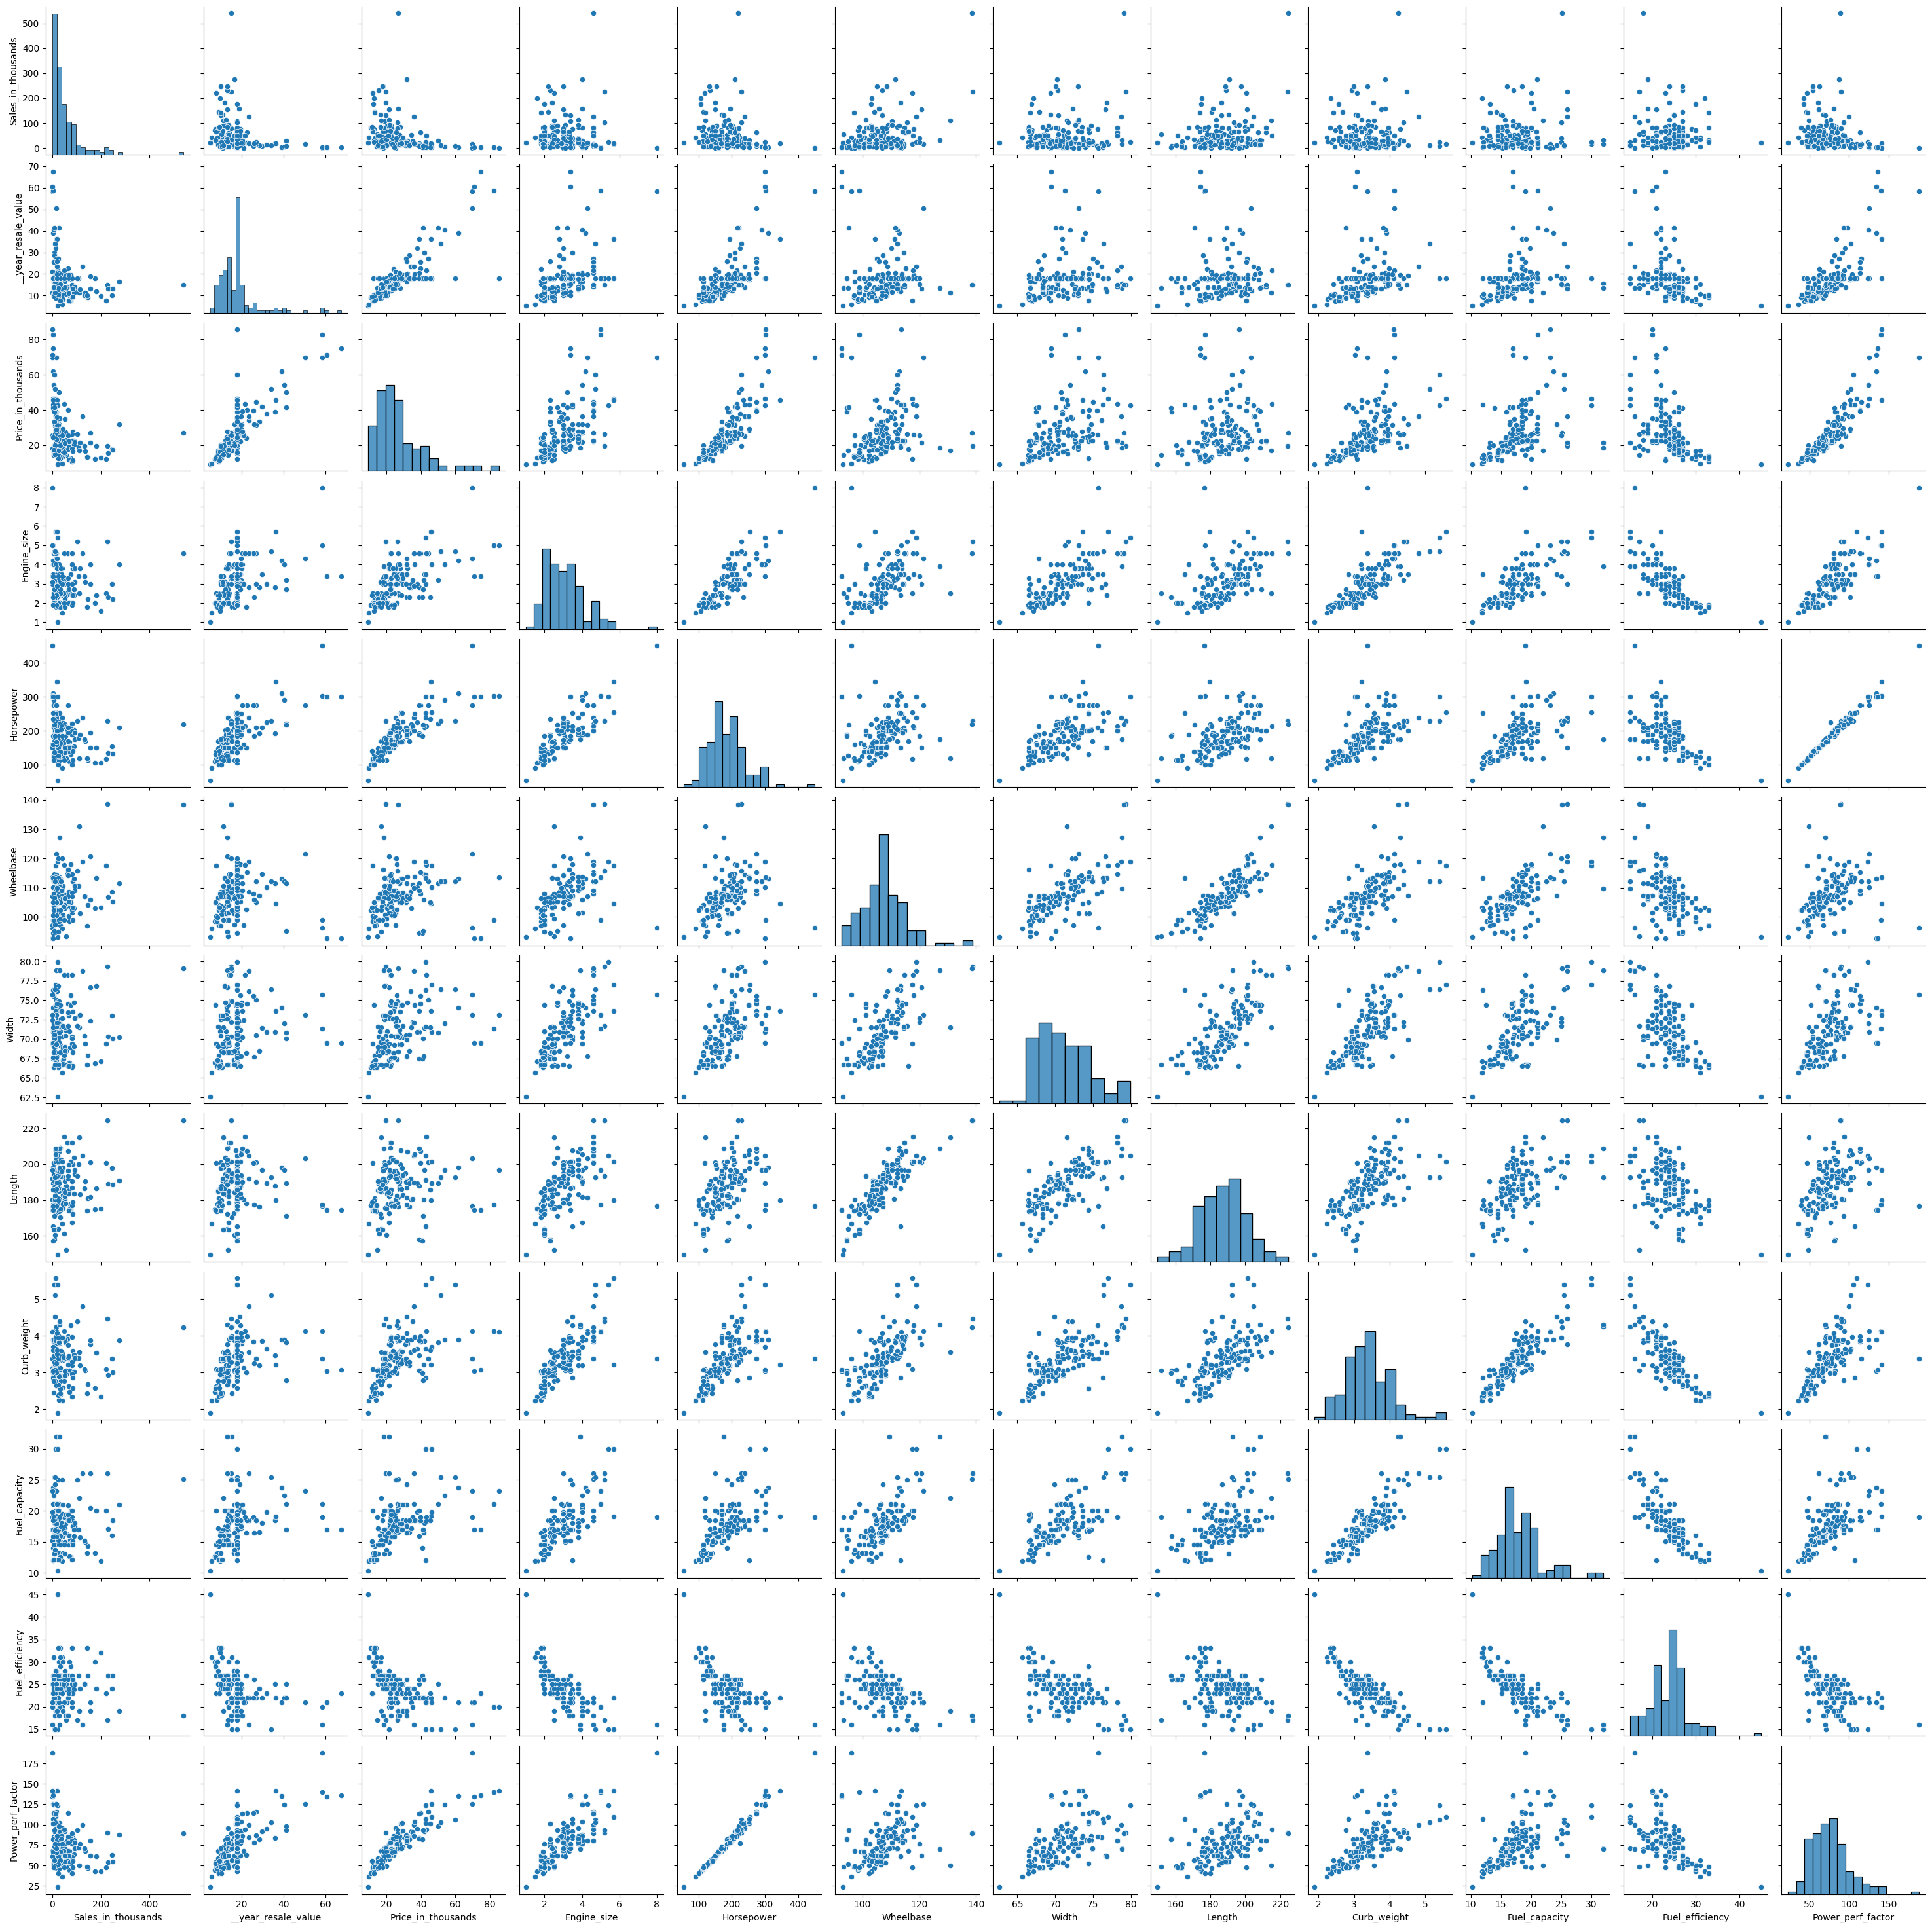

In [ ]:
import seaborn as sns
sns.pairplot(df.drop(['year', 'month', 'Manufacturer', 'Model', 'Vehicle_type'], axis=1))

Notes:
* Doesn't appear to be any observable correlation between the features and their sales

<Axes: xlabel='Sales_in_thousands', ylabel='__year_resale_value'>

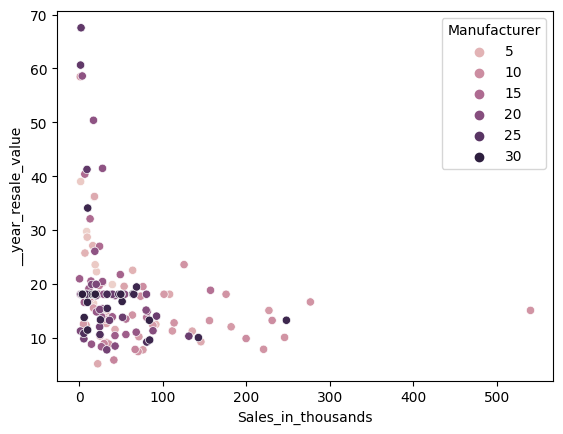

In [ ]:
sns.scatterplot(x='Sales_in_thousands', y='__year_resale_value', hue='Manufacturer', data=df)

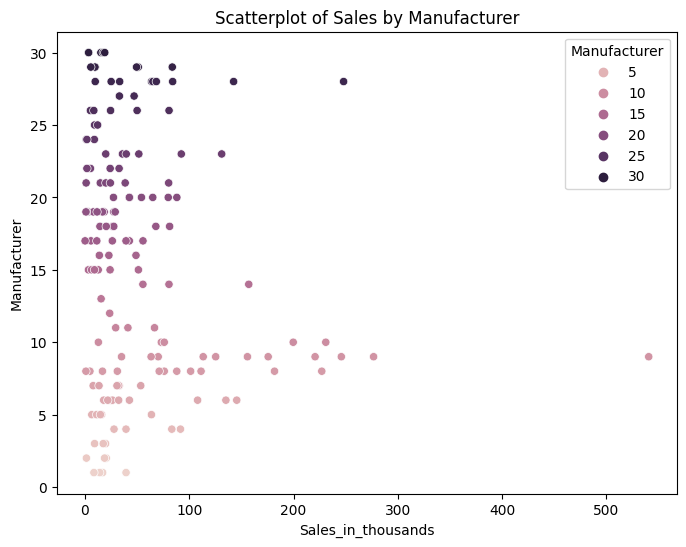

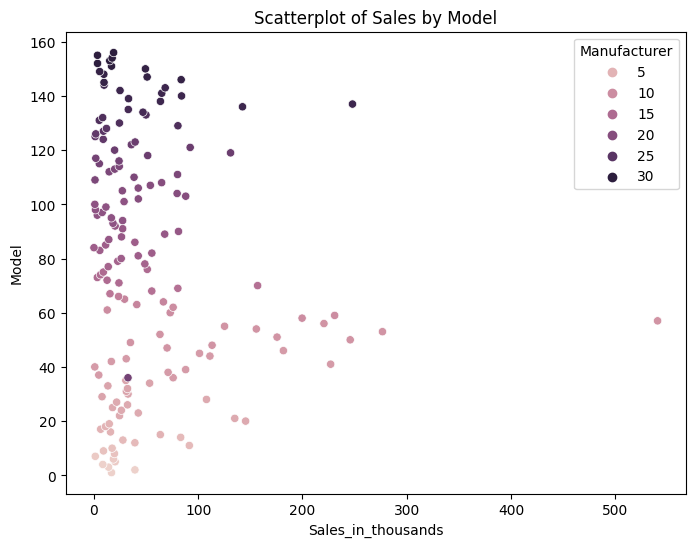

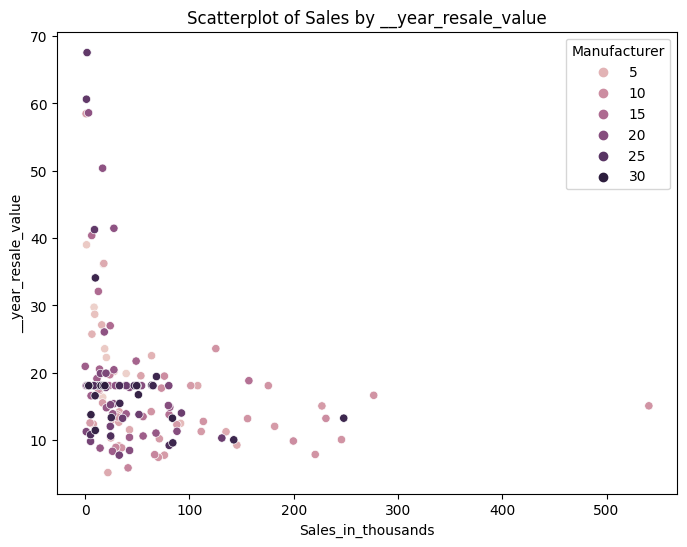

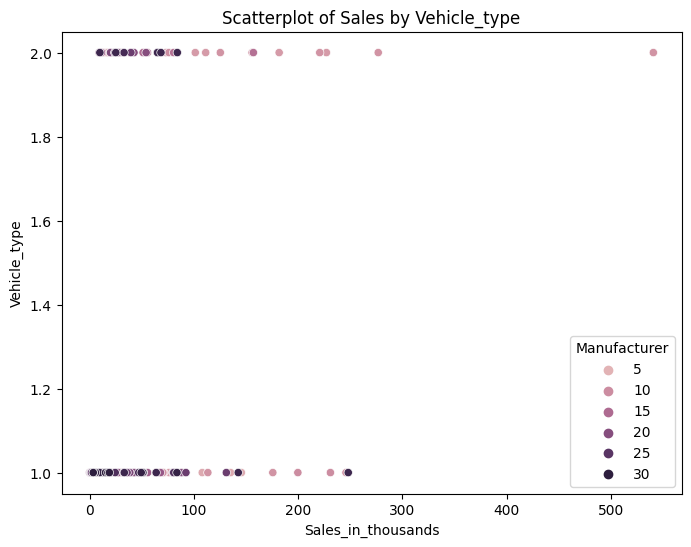

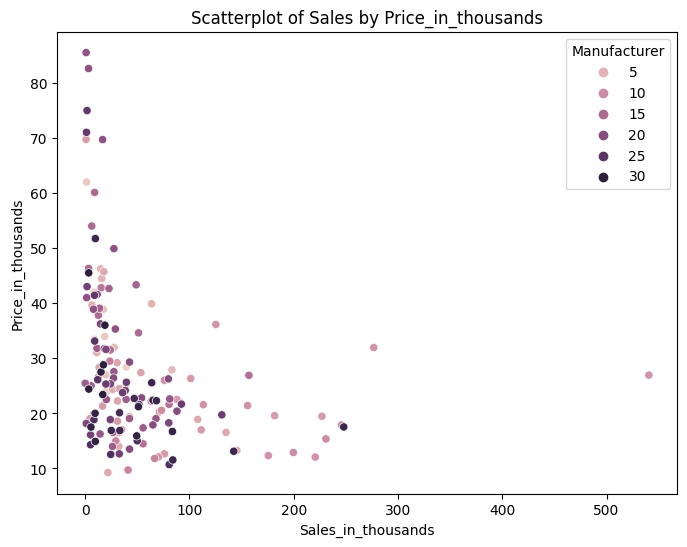

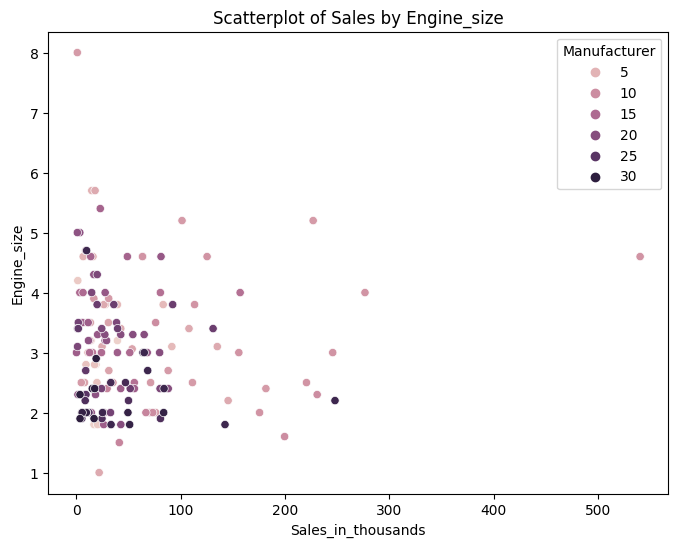

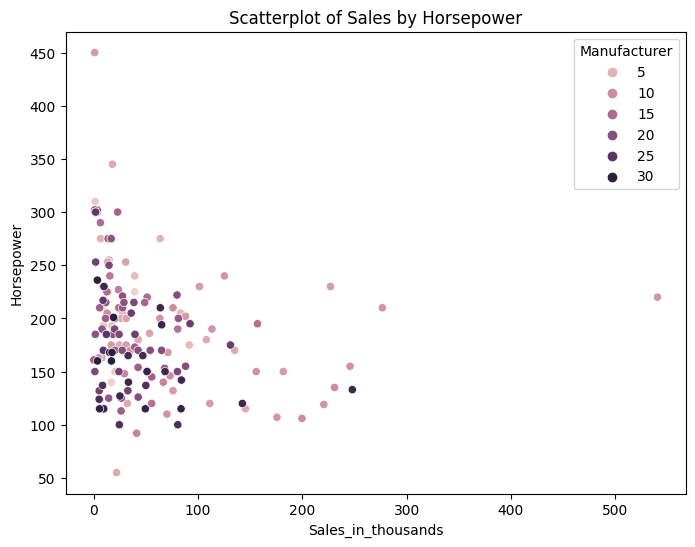

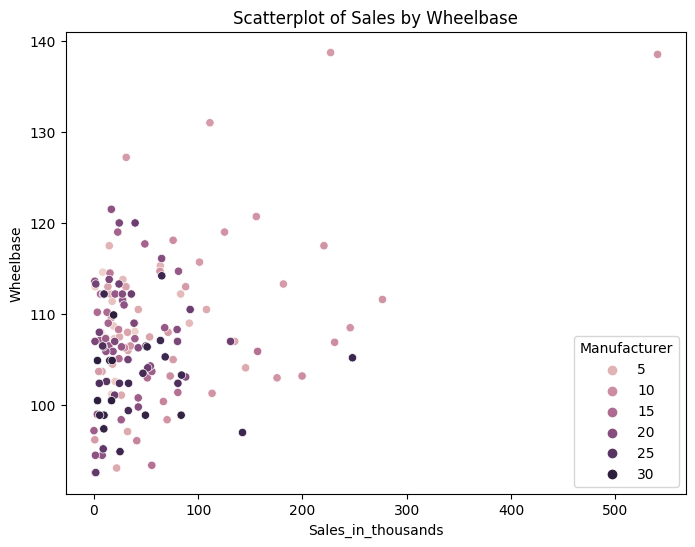

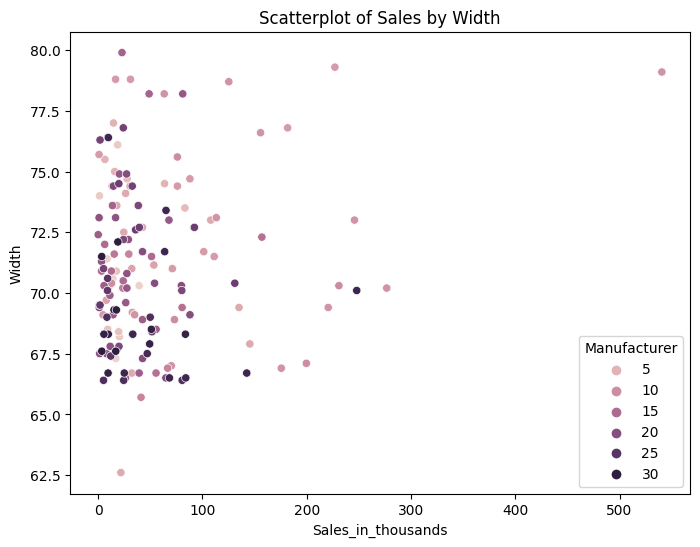

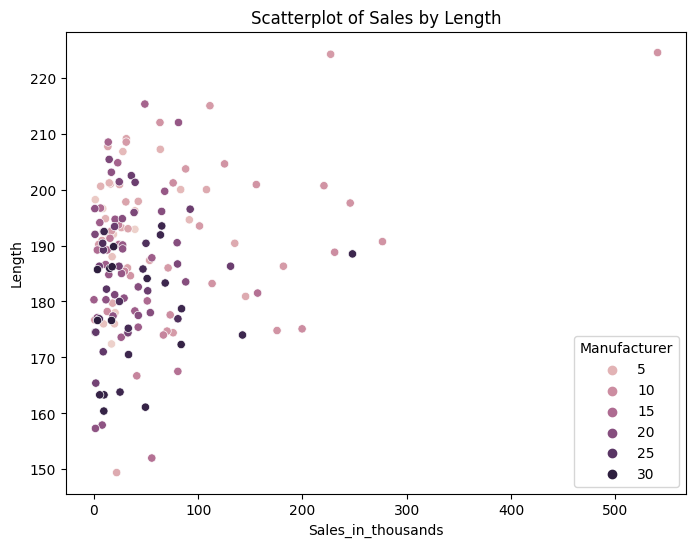

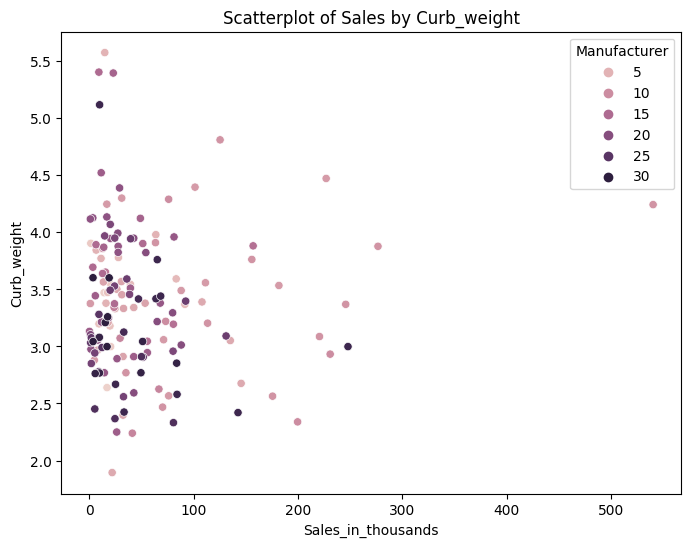

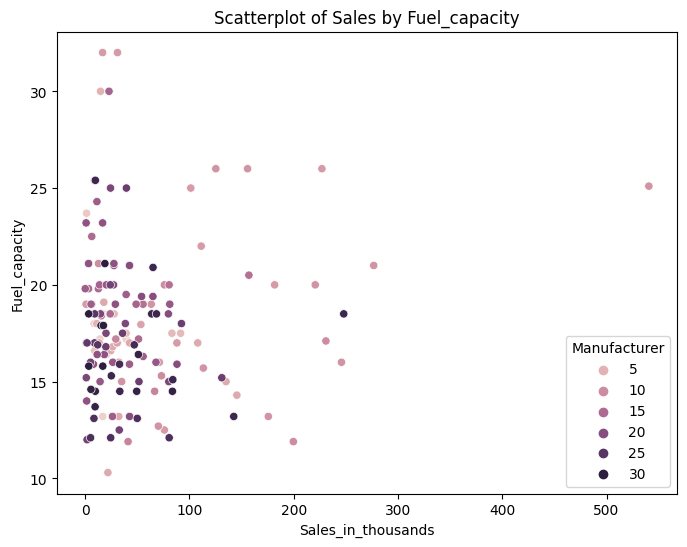

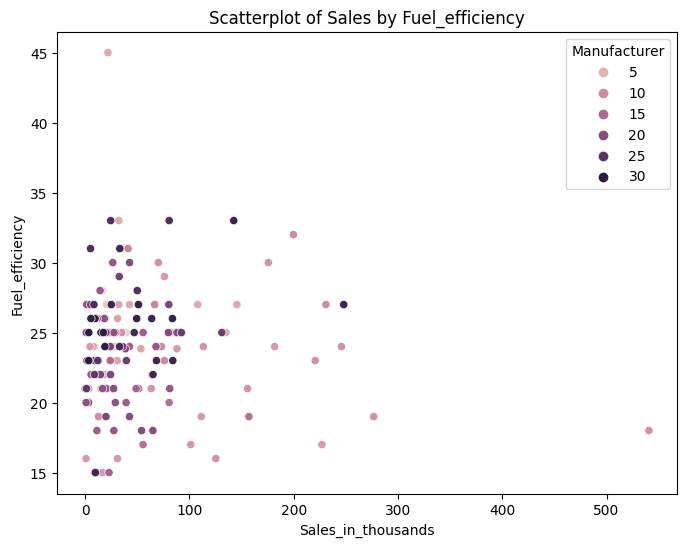

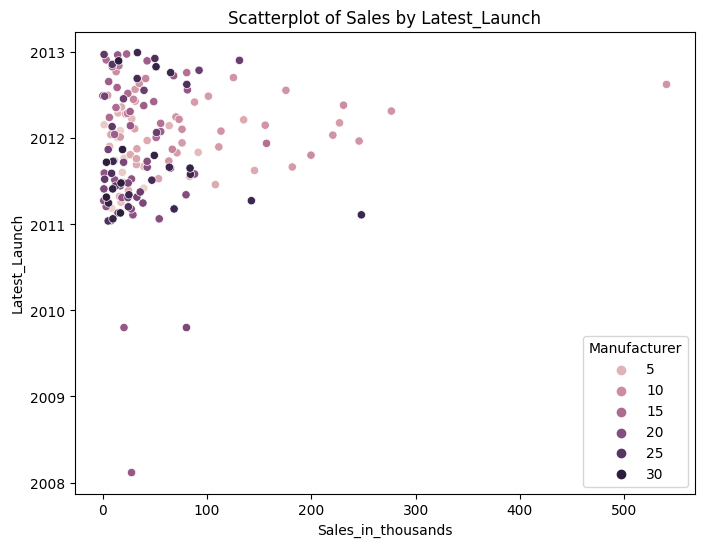

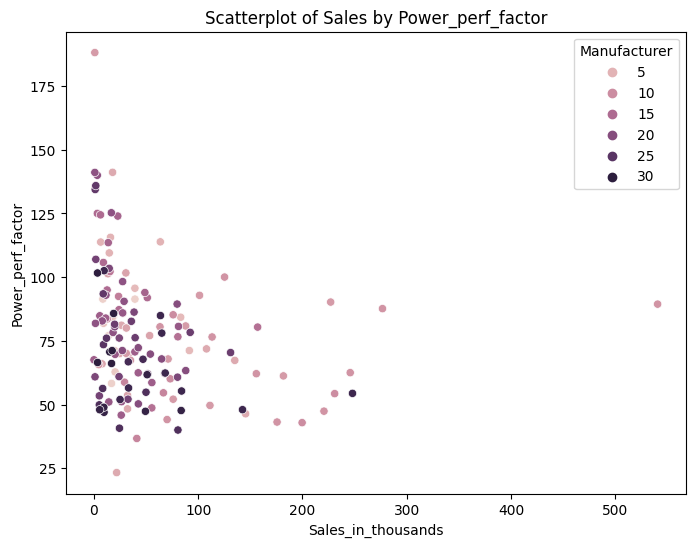

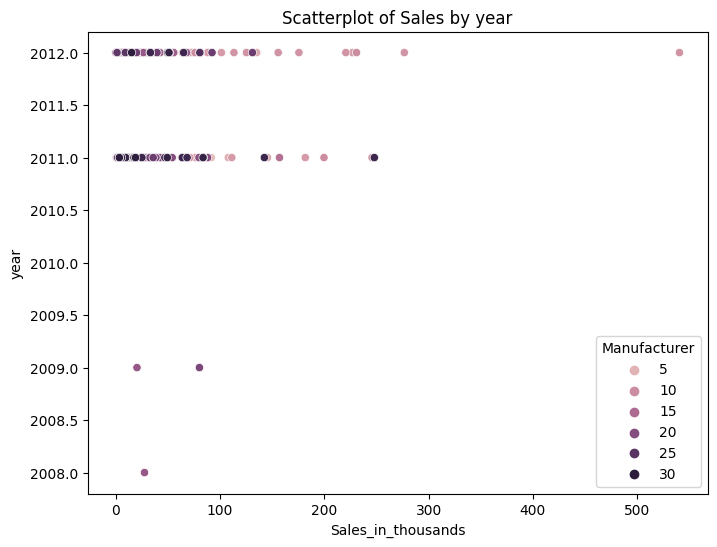

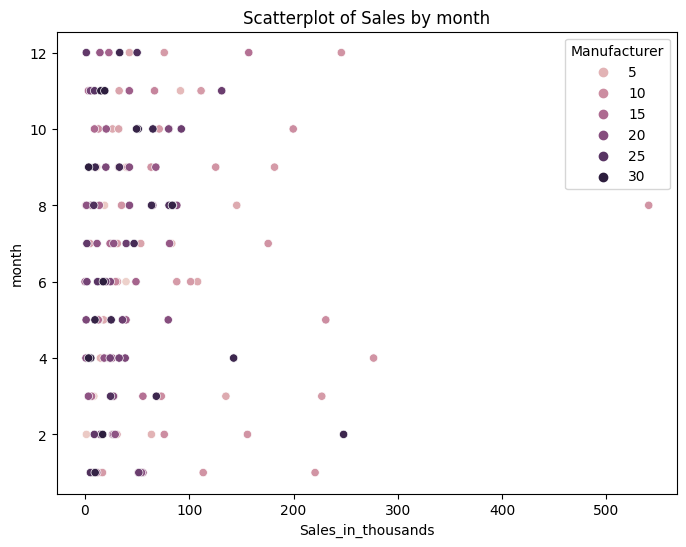

In [ ]:
import matplotlib.pyplot as plt
for column in df.columns:
    if column == 'Sales_in_thousands':
      continue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Sales_in_thousands', y=column, hue='Manufacturer', data=df)
    plt.title(f'Scatterplot of Sales by {column}')
    plt.show()

<Axes: xlabel='0', ylabel='1'>

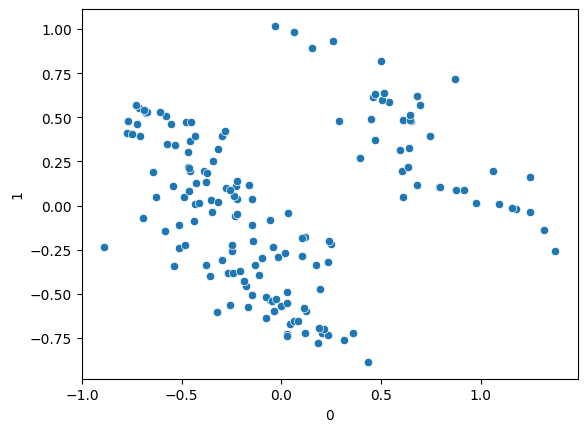

In [7]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
data = df.drop(['Latest_Launch'], axis=1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(pca_data)
sns.scatterplot(x = pca_df[0], y = pca_df[1])
#https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components

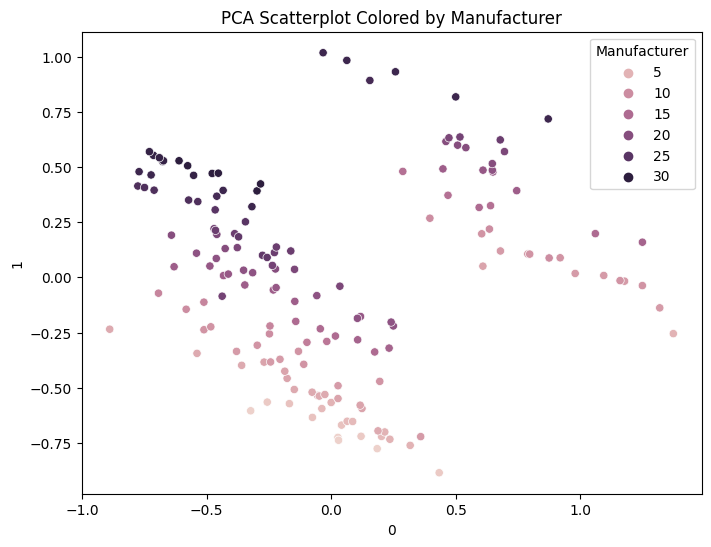

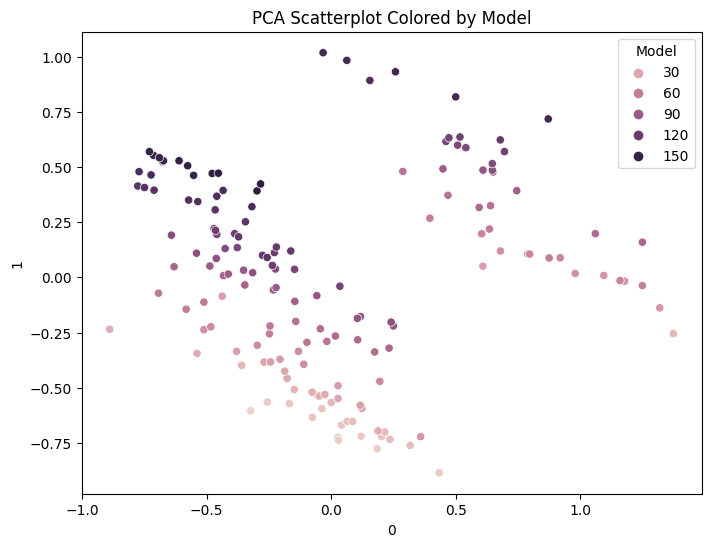

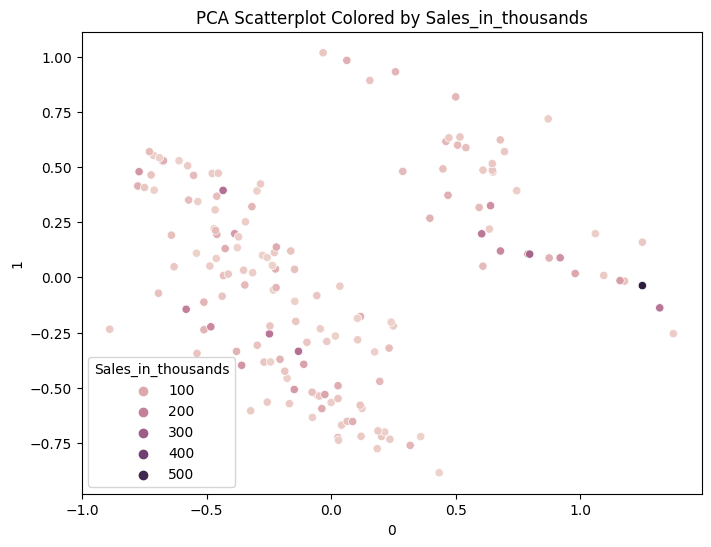

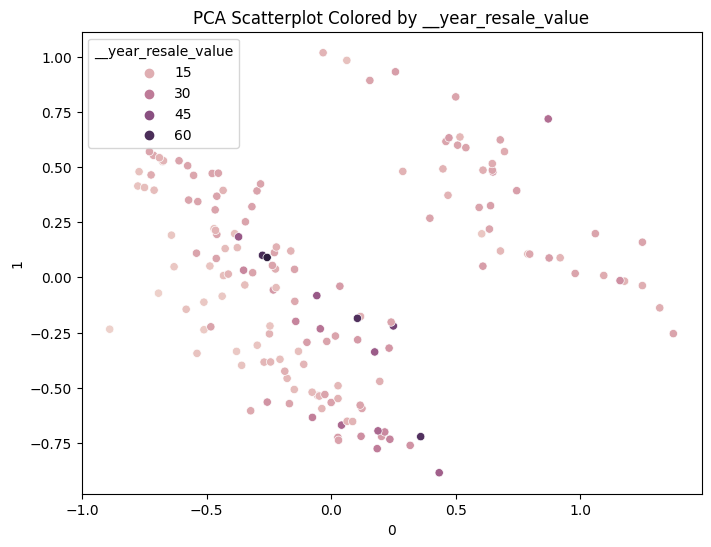

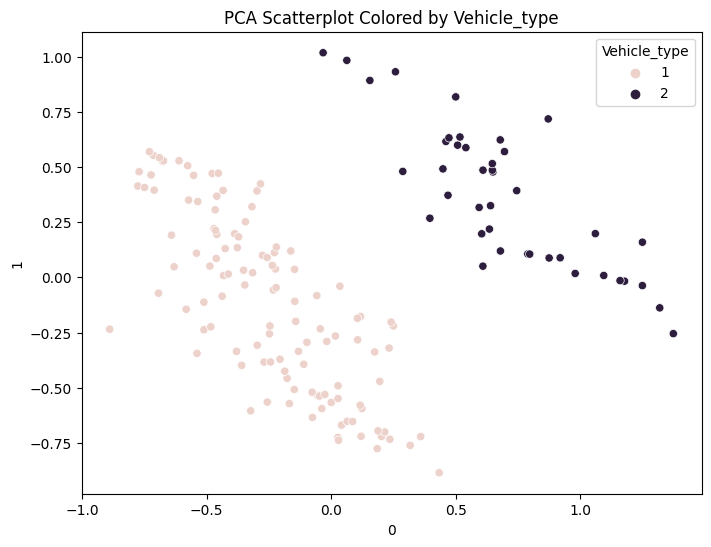

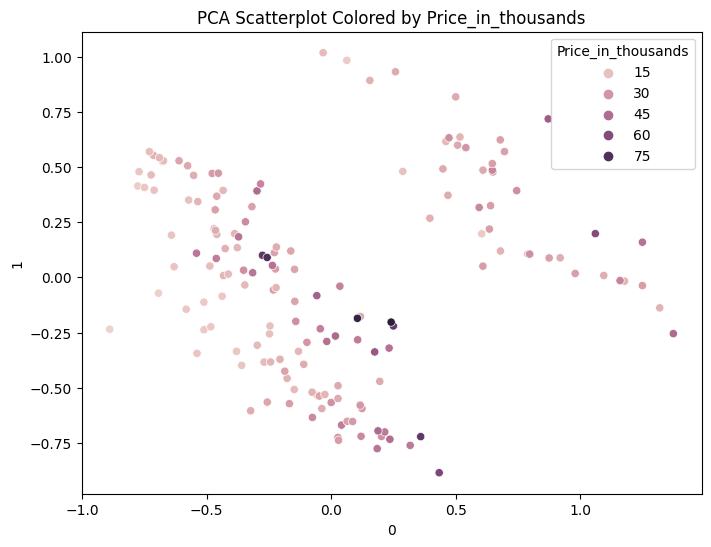

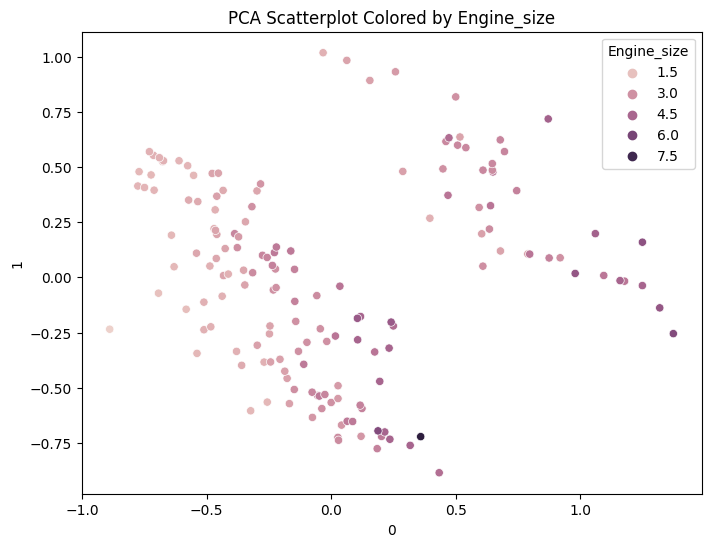

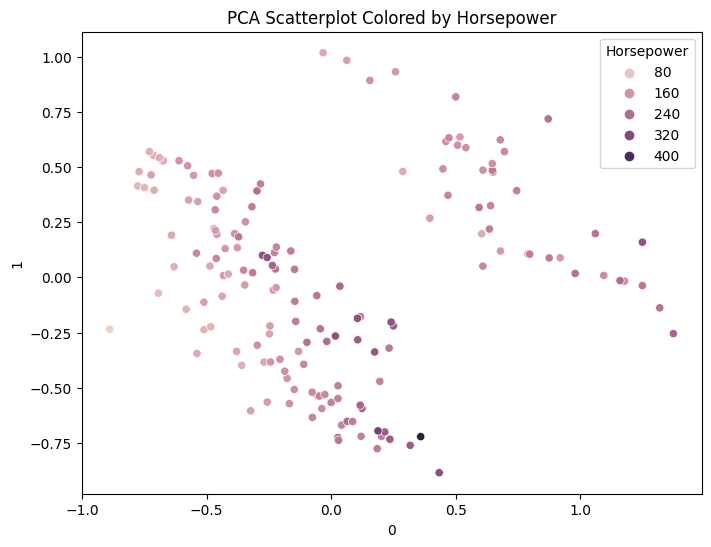

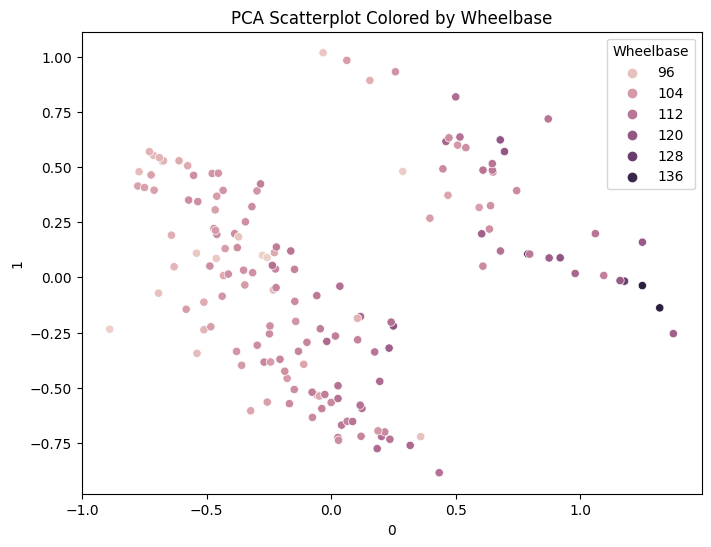

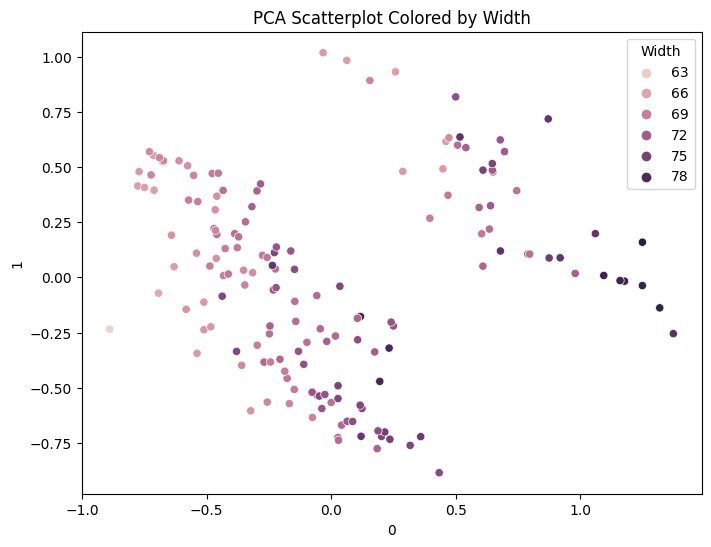

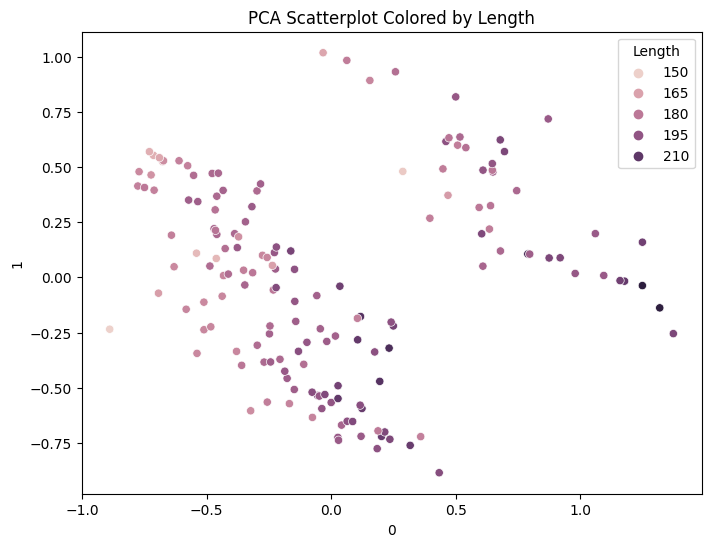

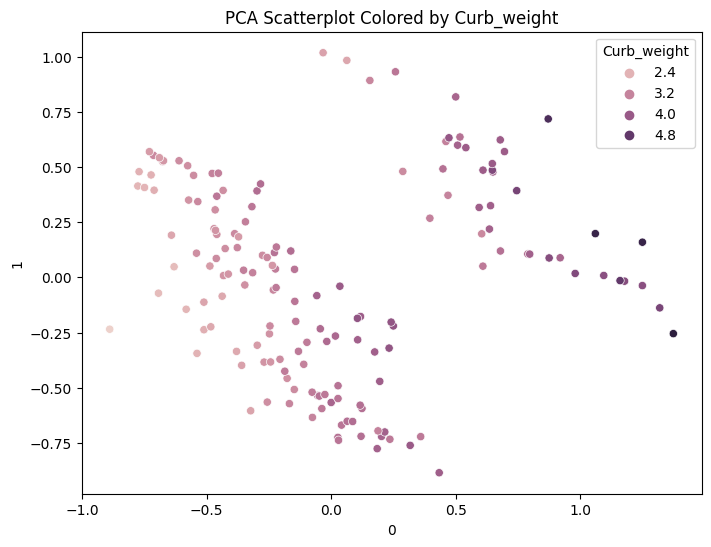

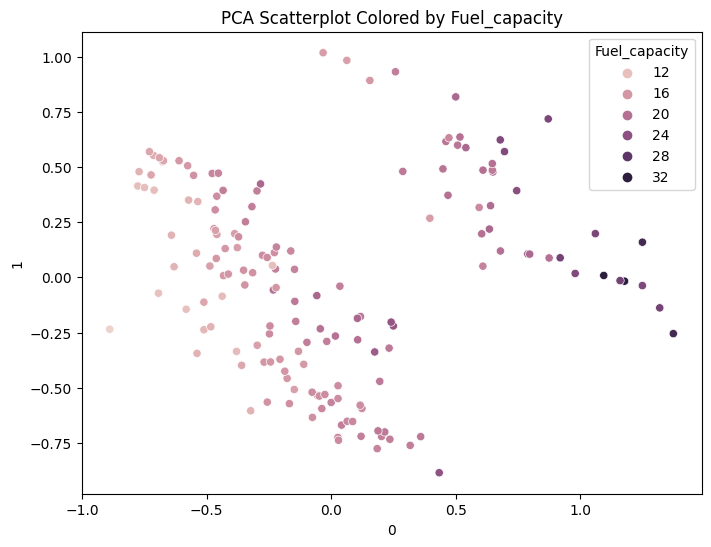

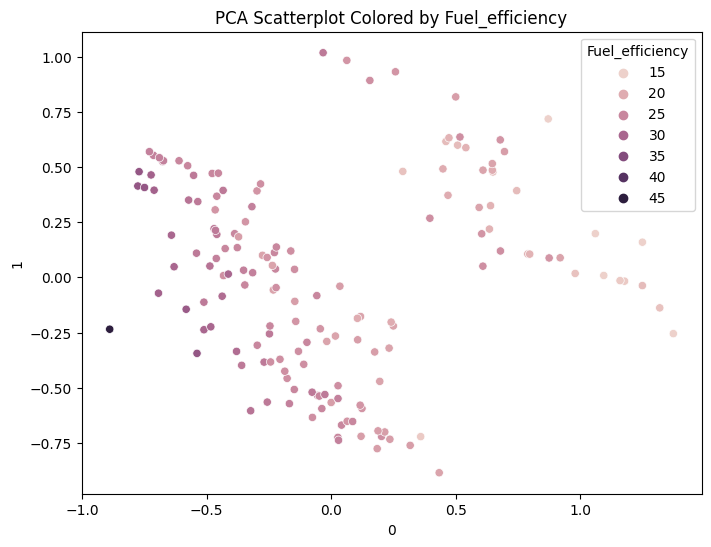

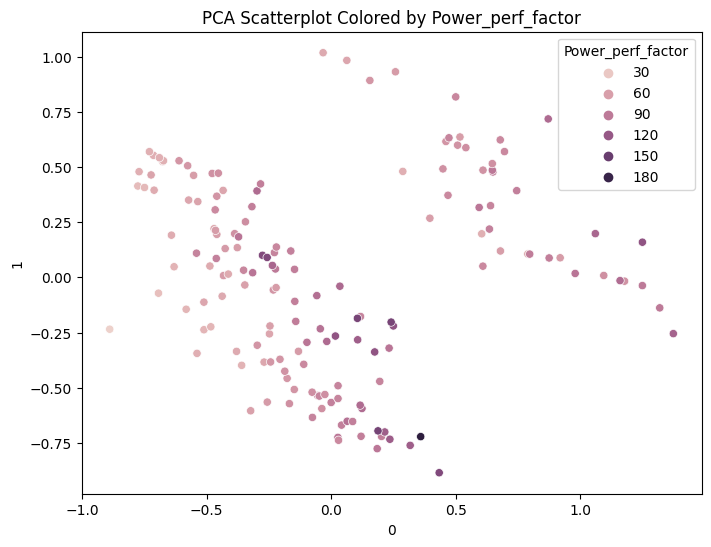

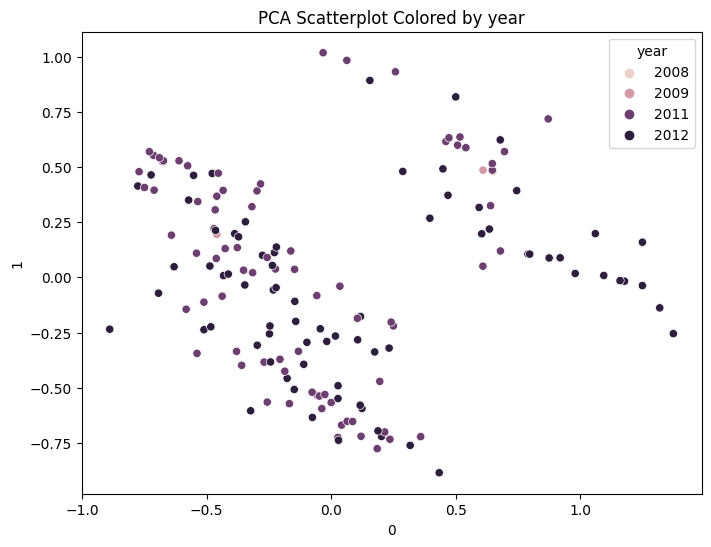

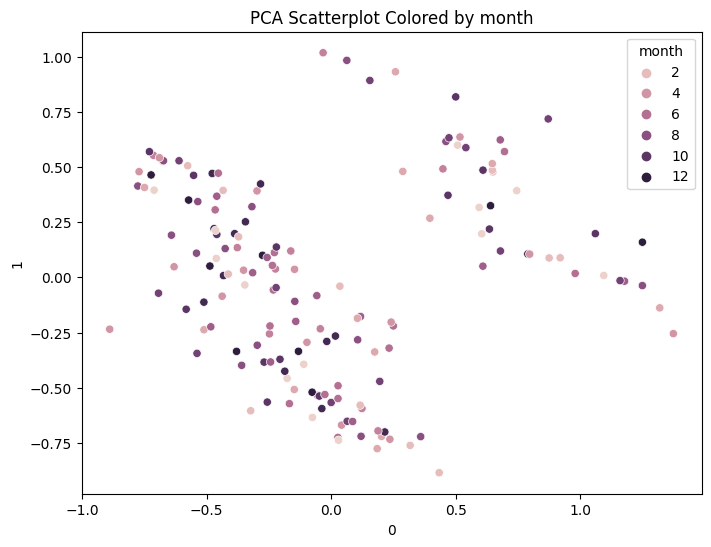

In [ ]:
import matplotlib.pyplot as plt
for column in df.columns:
    if column == 'Latest_Launch':
      continue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=column, data=df)
    plt.title(f'PCA Scatterplot Colored by {column}')
    plt.show()

* PCA seems to cleanly divide the groups by vehicle type, which is interesting
*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Variance')

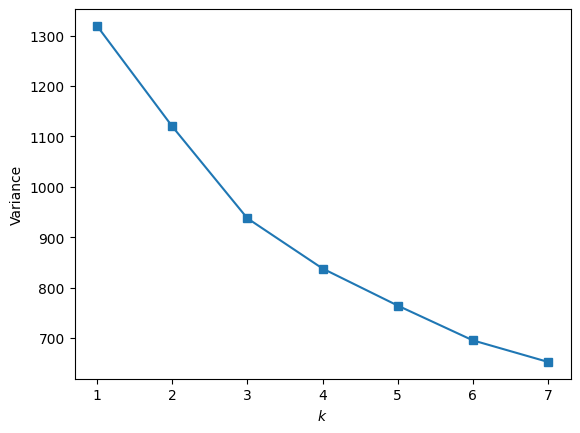

In [ ]:
import numpy as np
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

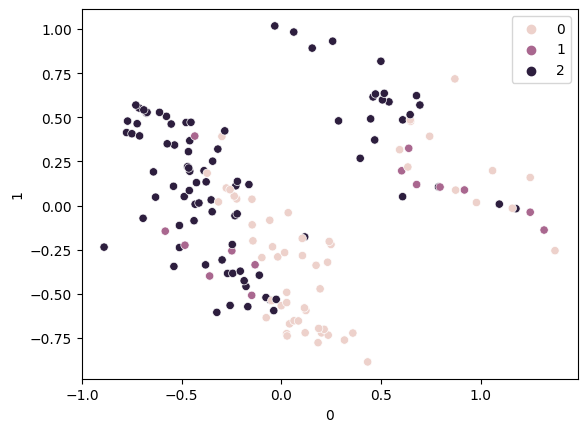

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(data)
y = kmeans.fit_predict(data)
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

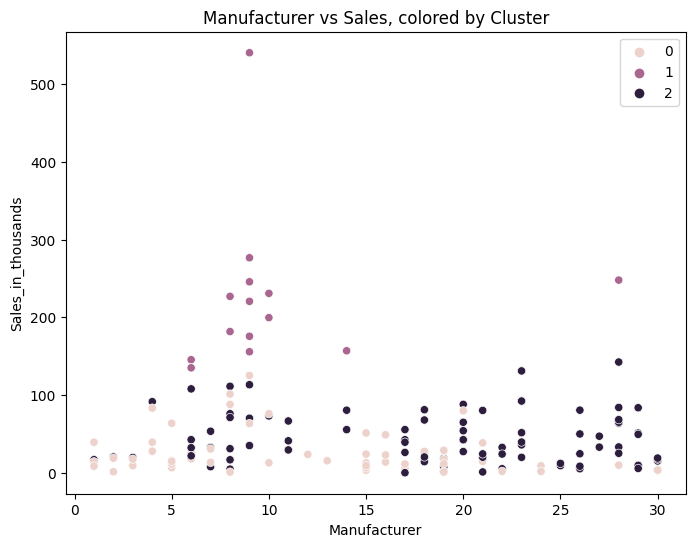

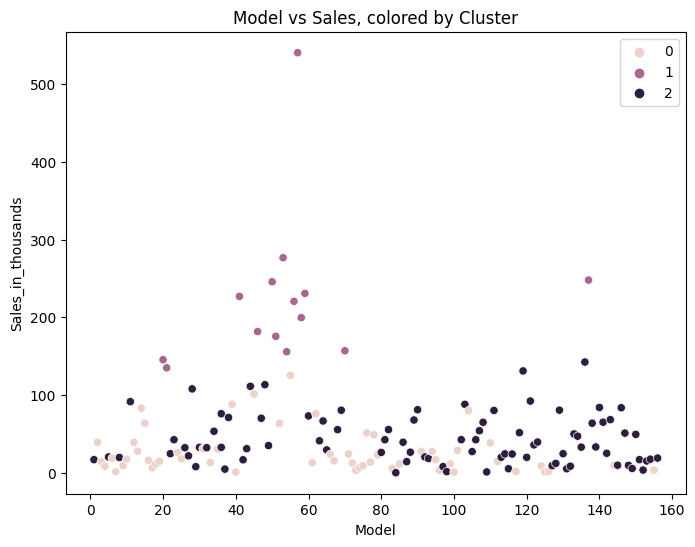

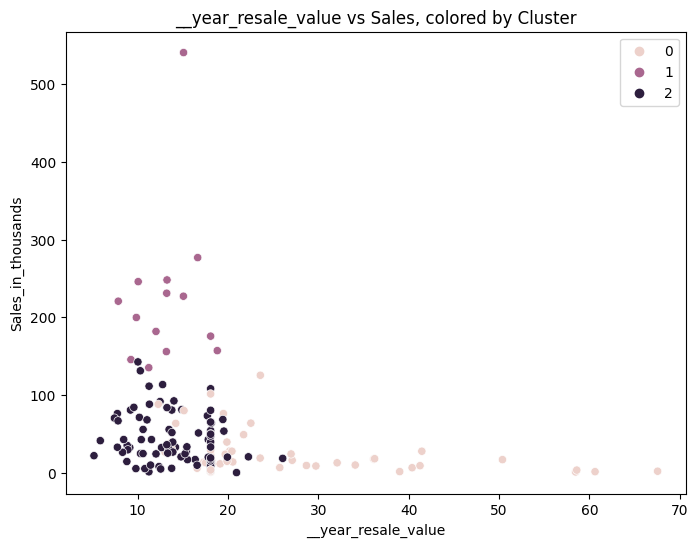

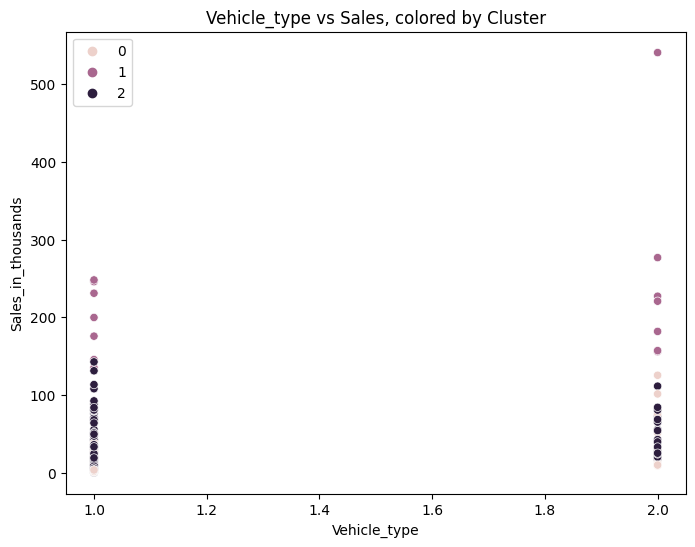

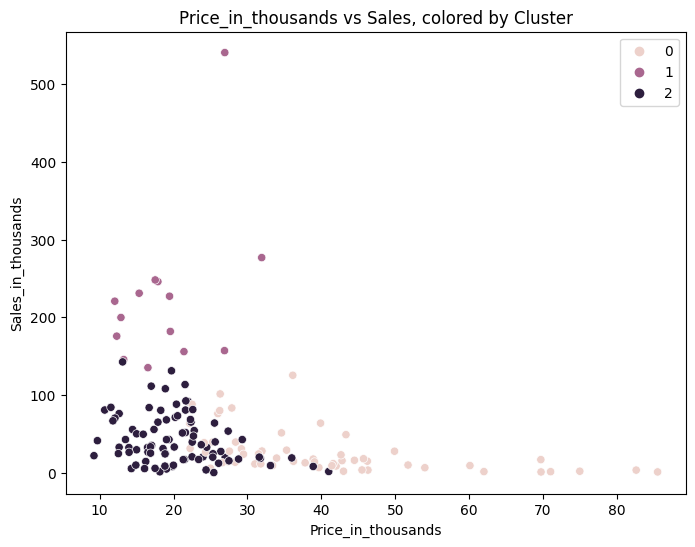

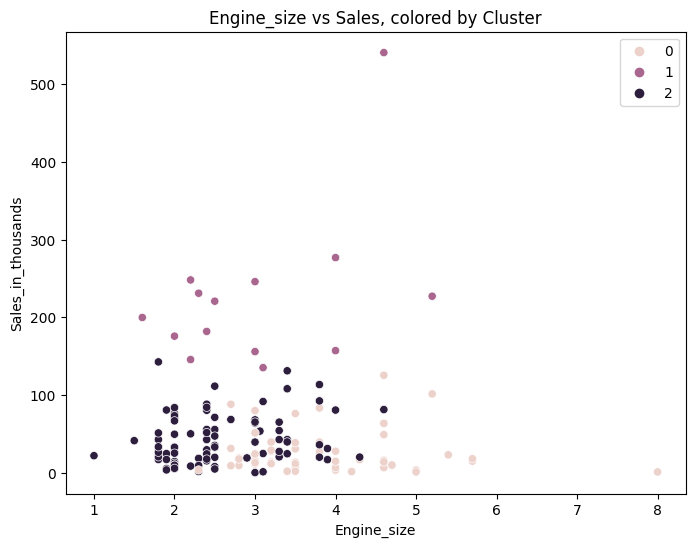

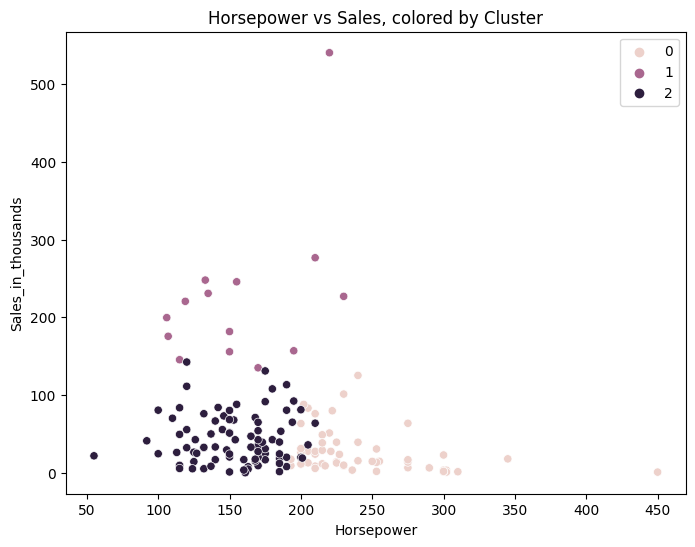

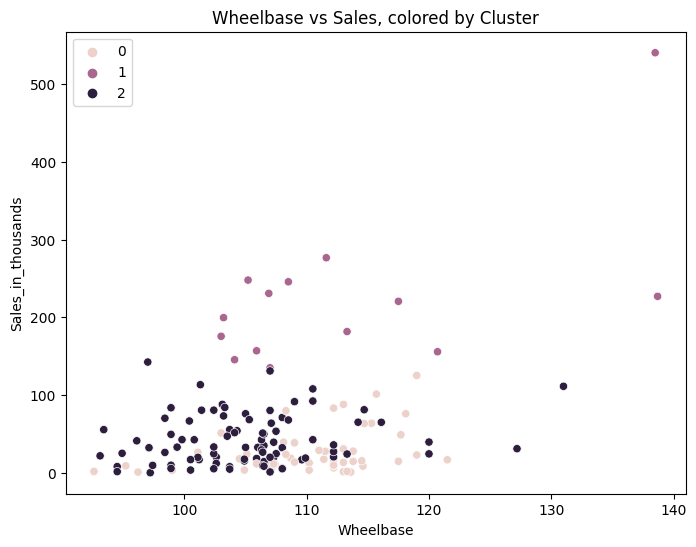

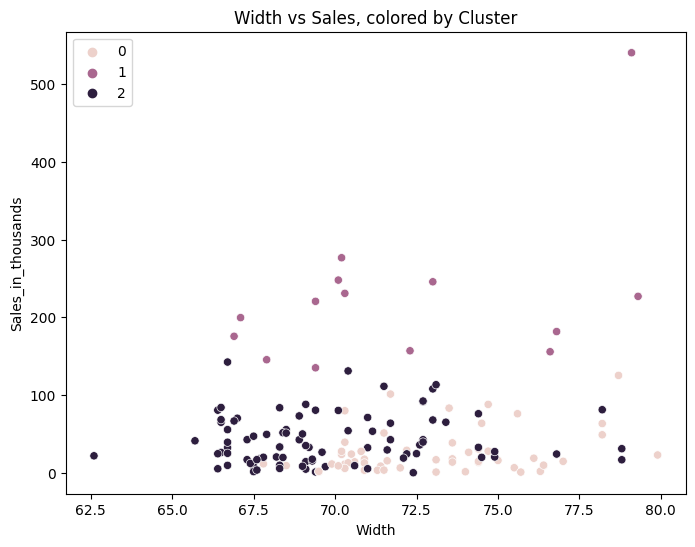

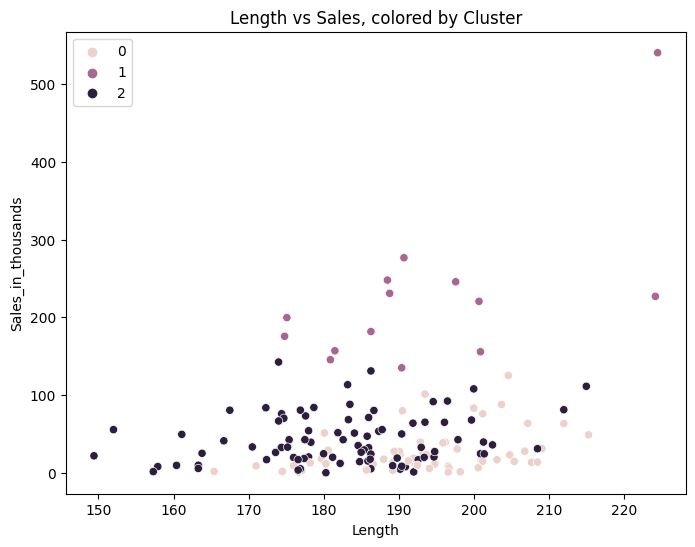

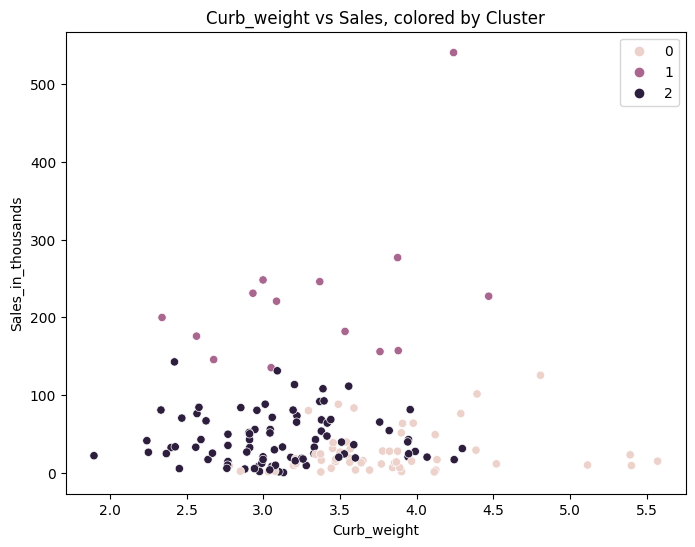

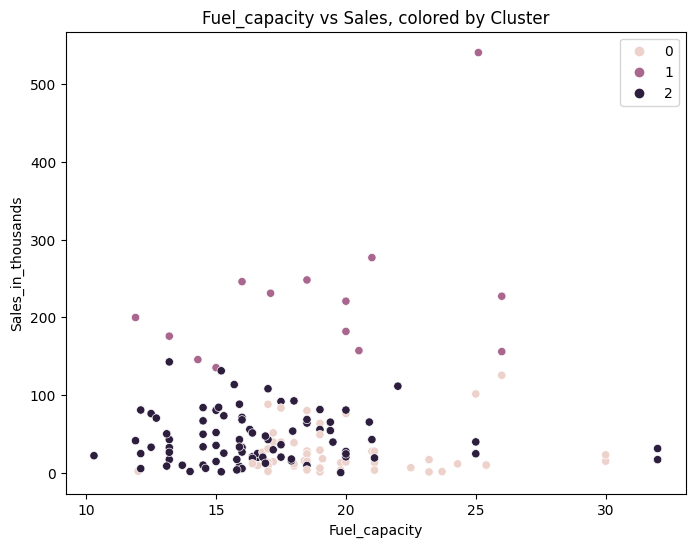

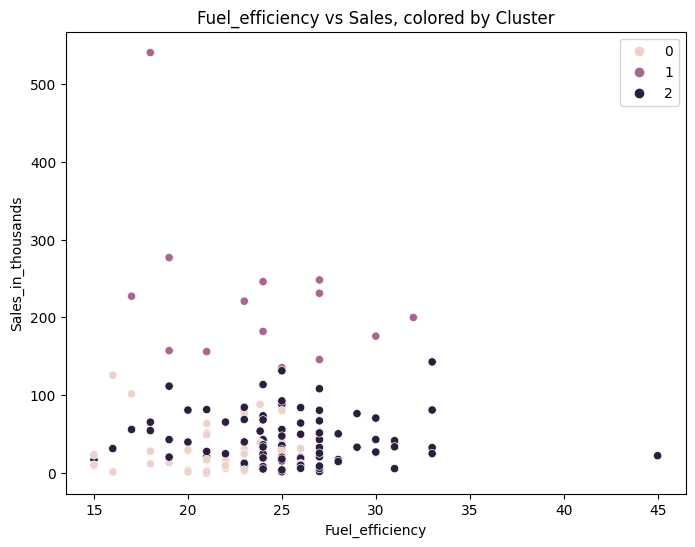

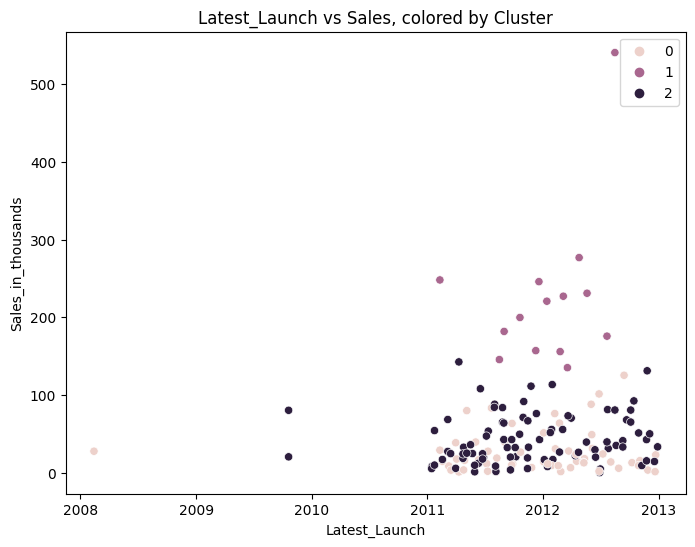

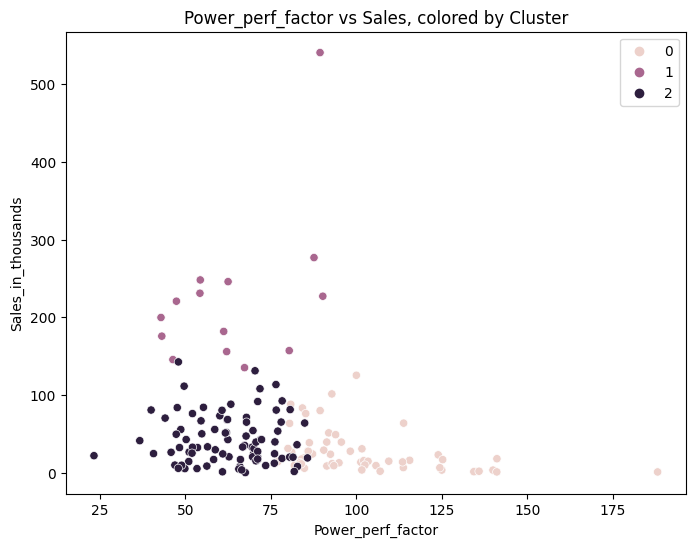

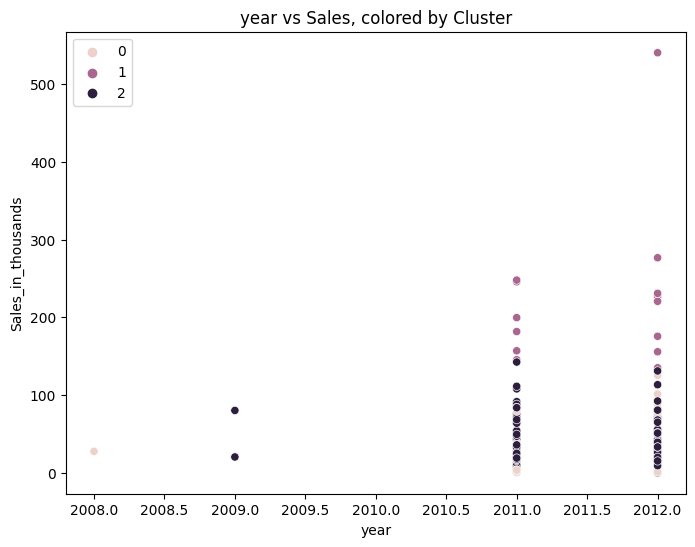

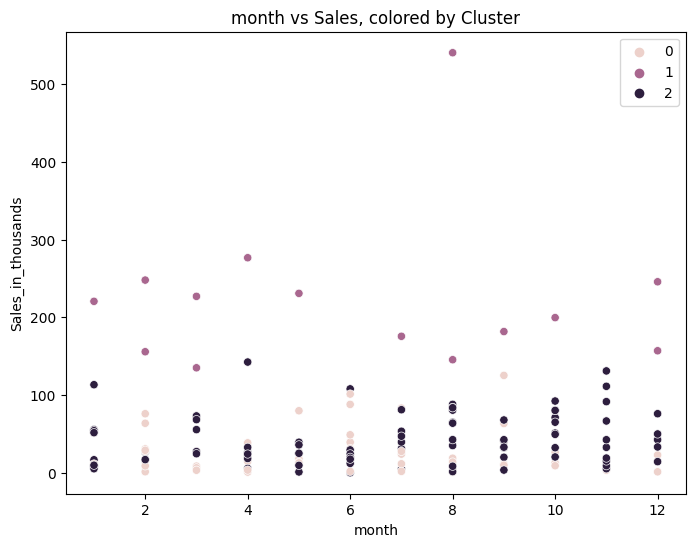

In [ ]:
for column in df.columns:
  if column == 'Sales_in_thousands':
    continue
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df[column], y=df['Sales_in_thousands'], hue=y)
  plt.title(f'{column} vs Sales, colored by Cluster')
  plt.show()

* Cluster 1 appears continually higher price than the others despite similar features, with a specific group of models/manufacturers
* Cluster 0 has noticeably higher resale value, initial price, horsepower, power performance factor,

<ipython-input-44-20ad9e8d8f7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


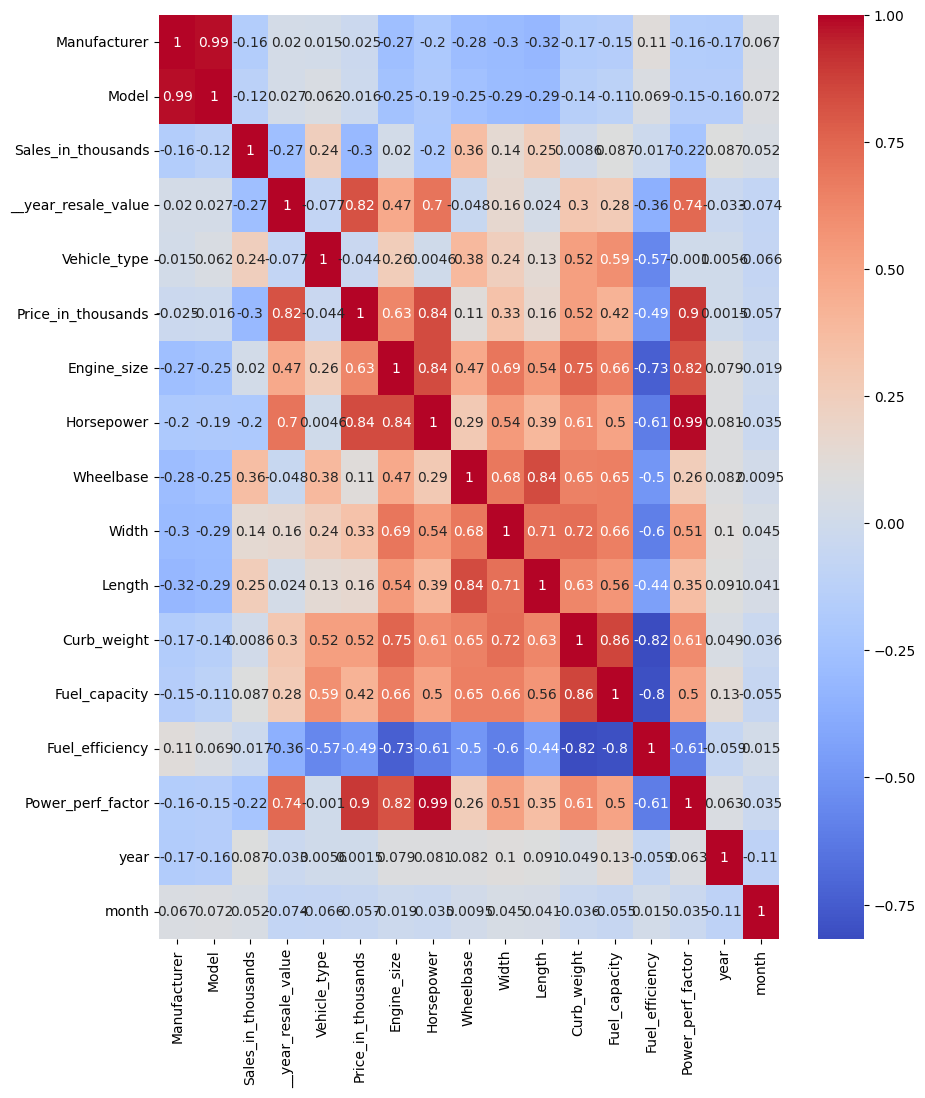

In [ ]:
corr_matrix = df.corr()


# Create the heatmap using the `heatmap` function of Seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

In [ ]:
df

Manufacturer  Model  Sales_in_thousands  __year_resale_value  \
0               1      1              16.919            16.360000   
1               1      2              39.384            19.875000   
2               1      3              14.114            18.225000   
3               1      4               8.588            29.725000   
4               2      5              20.397            22.255000   
..            ...    ...                 ...                  ...   
152            30    152               3.545            18.072975   
153            30    153              15.245            18.072975   
154            30    154              17.531            18.072975   
155            30    155               3.493            18.072975   
156            30    156              18.969            18.072975   

     Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0               1           21.500000          1.8       140.0      101.2   
1               1           28.400000          3.2       225.0      108.1   
2               1           27.390755          3.2       225.0      106.9   
3               1           42.000000          3.5       210.0      114.6   
4               1           23.990000          1.8       150.0      102.6   
..            ...                 ...          ...         ...        ...   
152             1           24.400000          1.9       160.0      100.5   
153             1           27.500000          2.4       168.0      104.9   
154             1           28.800000          2.4       168.0      104.9   
155             1           45.500000          2.3       236.0      104.9   
156             1           36.000000          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0    2012-02-02   
1     70.3   192.9        3.517           17.2             25.0    2011-06-03   
2     70.6   192.0        3.470           17.2             26.0    2012-01-04   
3     71.4   196.6        3.850           18.0             22.0    2011-03-10   
4     68.2   178.0        2.998           16.4             27.0    2011-10-08   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0    2011-09-21   
153   69.3   185.9        3.208           17.9             25.0    2012-11-24   
154   69.3   186.2        3.259           17.9             25.0    2011-06-25   
155   71.5   185.7        3.601           18.5             23.0    2011-04-26   
156   72.1   189.8        3.600           21.1             24.0    2011-11-14   

     Power_perf_factor  year  month  
0            58.280150  2012      2  
1            91.370778  2011      6  
2            77.043591  2012      1  
3            91.389779  2011      3  
4            62.777639  2011     10  
..                 ...   ...    ...  
152          66.498812  2011      9  
153          70.654495  2012     11  
154          71.155978  2011      6  
155         101.623357  2011      4  
156          85.735655  2011     11  

[157 rows x 18 columns]

In [8]:
X = df.drop(['Sales_in_thousands', 'Latest_Launch'], axis=1)
y = df['Sales_in_thousands']
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     5.067
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.32e-08
Time:                        20:35:08   Log-Likelihood:                -848.94
No. Observations:                 157   AIC:                             1732.
Df Residuals:                     140   BIC:                             1784.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.345e+04   1.53e+04     -0.880      0.381   -4.37e+04    1.68e+04
Manufacturer           -7.6083      3.357     -2.266      0.025     -14.246      -0.970
Model                   1.3779      0.639      2.156      0.033       0.114       2.642
__year_resale_value     0.4985      0.879      0.567      0.572      -1.240       2.237
Vehicle_type           36.8261     18.882      1.950      0.053      -0.504      74.156
Price_in_thousands     -0.7301      1.939     -0.376      0.707      -4.564       3.104
Engine_size            29.0894     11.044      2.634      0.009       7.254      50.925
Horsepower             -0.9803      1.492     -0.657      0.512      -3.930       1.970
Wheelbase               3.6477      1.367      2.669      0.008       0.946       6.349
Width                   1.3824      2.428      0.569      0.570      -3.419       6.184
Length                  0.5120      0.817      0.627      0.532      -1.102       2.126
Curb_weight           -52.4882     20.800     -2.523      0.013     -93.611     -11.365
Fuel_capacity          -1.8652      2.786     -0.670      0.504      -7.372       3.642
Fuel_efficiency         0.6454      2.328      0.277      0.782      -3.958       5.248
Power_perf_factor       1.3014      4.253      0.306      0.760      -7.106       9.709
year                    6.4987      7.599      0.855      0.394      -8.525      21.523
month                   0.6327      1.399      0.452      0.652      -2.133       3.399
==============================================================================
Omnibus:                      101.931   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.693
Skew:                           2.311   Prob(JB):                    4.37e-163
Kurtosis:                      12.640   Cond. No.                     6.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = add_constant(df.drop(['Sales_in_thousands', 'Latest_Launch'], axis=1))
ds=pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)
print(ds)

const                  1.123371e+07
Manufacturer           3.985176e+01
Model                  3.980693e+01
__year_resale_value    3.726593e+00
Vehicle_type           3.307168e+00
Price_in_thousands     3.653231e+01
Engine_size            6.317993e+00
Horsepower             3.397746e+02
Wheelbase              5.175089e+00
Width                  3.335256e+00
Length                 5.709653e+00
Curb_weight            8.110559e+00
Fuel_capacity          5.566858e+00
Fuel_efficiency        4.657884e+00
Power_perf_factor      5.391088e+02
year                   1.106032e+00
month                  1.067456e+00
dtype: float64


In [13]:
#X = df.drop(['Sales_in_thousands', 'Latest_Launch', ''], axis=1)
X = df[['Manufacturer', 'Model', 'Vehicle_type', 'Engine_size', 'Wheelbase', 'Curb_weight']]

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     11.18
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.70e-10
Time:                        20:40:48   Log-Likelihood:                -855.78
No. Observations:                 157   AIC:                             1726.
Df Residuals:                     150   BIC:                             1747.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -313.5094     76.106     -4.119      0.000    -463.888    -163.131
Manufacturer    -7.2604      3.312     -2.192      0.030     -13.804      -0.716
Model            1.2816      0.628      2.040      0.043       0.040       2.523
Vehicle_type    44.1805     12.987      3.402      0.001      18.520      69.841
Engine_size      8.6121      7.105      1.212      0.227      -5.428      22.652
Wheelbase        4.9384      0.829      5.960      0.000       3.301       6.576
Curb_weight    -69.2136     14.555     -4.755      0.000     -97.972     -40.455
==============================================================================
Omnibus:                       94.162   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.564
Skew:                           2.163   Prob(JB):                    3.83e-126
Kurtosis:                      11.342   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
X = df[['Manufacturer', 'Model', 'Vehicle_type', 'Engine_size', 'Wheelbase', 'Curb_weight']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca_X = pd.DataFrame(pca.fit_transform(X_scaled))

y = df['Sales_in_thousands']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error #manual says its equivalent to RMSE if not squared so
lreg = LinearRegression().fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False)}, r^2 = {r2_score(y_test, y_pred)}")

RMSE = 76.34958062333097, r^2 = 0.3607064508362049


Text(0.5, 1.0, 'Regression Accuracy')

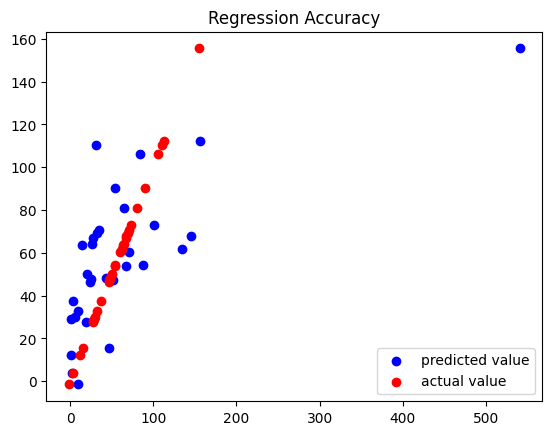

In [75]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y=y_pred, c='b', label='predicted value')
plt.scatter(y_pred, y=y_pred, c='r', label='actual value')
plt.legend(loc='lower right')

plt.title("Regression Accuracy")